In [16]:
from scipy.linalg import hadamard
import numpy as np
import random
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.fftpack import dct
from scipy.fftpack import idct
import scipy

In [6]:
N = 4

#Implementing 2D Hadamard on a given NxN matrix
# generate integer numbers between 0 and 19
mat = np.random.randint(20, size= (N, N))
print(mat)

# Hadamard matrix of order N
H = hadamard(N)
print("\n", H)

mat_had= np.dot(H, mat)  #using np.dot function for matrix multiplication
mat_had= np.dot(mat_had, np.transpose(H))
print("\n", mat_had)

# Inverse Hadamard transform
mat_new = np.dot(np.transpose(H), mat_had)
mat_new = np.dot(mat_new, H)
mat_new = mat_new//(N*N)
print("\n", mat_new)

[[11  2  5 15]
 [ 7 11 14  0]
 [ 1 12  5  8]
 [10 11 12  9]]

 [[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]

 [[133  -3  -3 -11]
 [-15 -27 -11  33]
 [ -3  21  -3  13]
 [ 17   5 -11  41]]

 [[11  2  5 15]
 [ 7 11 14  0]
 [ 1 12  5  8]
 [10 11 12  9]]


In [7]:
N=4

# walsh transform
W = hadamard(N)/4
print(W)

mat = np.random.randint(20, size= (N,N))
print("\n", mat)

# Walsh tranform of image
mat_walsh = np.dot(W, mat) #using np.dot function for matrix multiplication
mat_walsh = np.dot(mat_walsh, np.transpose(W))
print("\n", mat_walsh)

# Inverse Walsh transform
mat_new = np.dot(np.transpose(W), mat_walsh)
mat_new = np.dot(mat_new, W)
mat_new = mat_new*(N*N)
print("\n", mat_new)

[[ 0.25  0.25  0.25  0.25]
 [ 0.25 -0.25  0.25 -0.25]
 [ 0.25  0.25 -0.25 -0.25]
 [ 0.25 -0.25 -0.25  0.25]]

 [[12 12  2  3]
 [ 1  2 12 16]
 [ 2 16 13 11]
 [15  2  5 18]]

 [[ 8.875 -1.125 -1.125  0.875]
 [ 0.    -0.5    2.75  -2.75 ]
 [-1.375  0.375  0.375 -0.375]
 [-0.25   1.     2.75   2.5  ]]

 [[12. 12.  2.  3.]
 [ 1.  2. 12. 16.]
 [ 2. 16. 13. 11.]
 [15.  2.  5. 18.]]


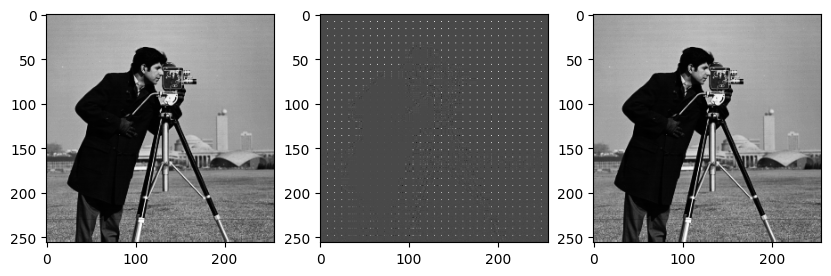

In [14]:
#hadamard transform function
def had(f, N):
  H = hadamard(N)
  F = np.dot(np.dot(H, f),H)
  return(F)

#Inverse Hadamard
def had2inv(F, N):
  H = hadamard(N)
  f = np.dot(np.dot(H,F), H)
  f = f//(N*N)

  return(f)


img = mpimg.imread('camera.tif')
r, c = img.shape #Find and store size of image in m,n

N = 8
# Hadamard Transform
imghad = np.zeros((r,c), dtype=int)

for row in range(r//N):
  for col in range(c//N):
    imghad[row*N:(row+1)*N,col*N:(col+1)*N] = had(img[row*N:(row+1)*N,col*N:(col+1)*N], N)

#Inverse Hadamard transform
imgnew = np.zeros((r,c), dtype=int)
for row in range(r//N):
  for col in range(c//N):
    imgnew[row*N:(row+1)*N,col*N:(col+1)*N] = had2inv(imghad[row*N:(row+1)*N,col*N:(col+1)*N], N)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(imghad, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(imgnew, cmap="gray")

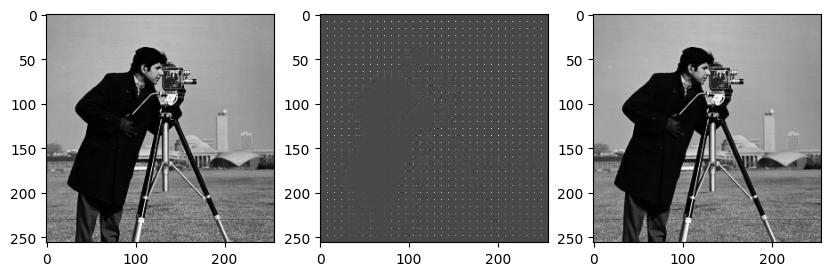

In [19]:
def walsh(f, N):
  W = hadamard(N)/4
  F = np.dot(np.dot(W, f), np.transpose(W))
  return(F)

def iwalsh(F, N):
  W = hadamard(N)/4
  f = np.dot(np.dot(np.transpose(W),F), W)
  f = f*(N*N)

  return(f)


img = mpimg.imread('camera.tif')
r, c = img.shape #Find and store size of image in m,n

N = 8

imgwalsh = np.zeros((r,c), dtype=int)
for row in range(r//N):
  for col in range(c//N):
    imgwalsh[row*N:(row+1)*N,col*N:(col+1)*N] = walsh(img[row*N:(row+1)*N,col*N:(col+1)*N], N)

imgnew = np.zeros((r,c), dtype=int)
for row in range(r//N):
  for col in range(c//N):
    imgnew[row*N:(row+1)*N,col*N:(col+1)*N] = iwalsh(imgwalsh[row*N:(row+1)*N,col*N:(col+1)*N], N)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(imgwalsh, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(imgnew, cmap="gray")

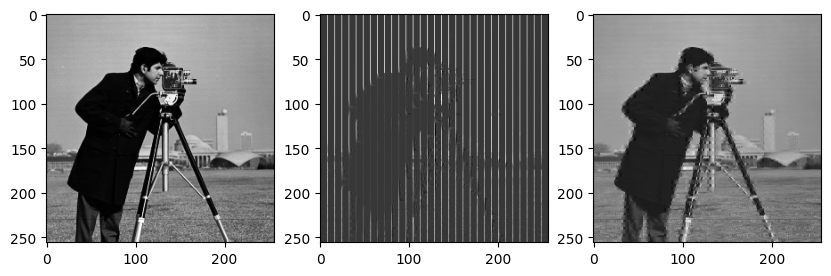

In [17]:
img = mpimg.imread('camera.tif')
m, n = img.shape

N=8

imgdct = np.zeros((m, n),dtype=int)

for r in range(m//N):
  for c in range(n//N):
    temp = dct(img[r*N:(r+1)*N,c*N:(c+1)*N])
    temp[2:7,2:7]=0
    imgdct[r*N:(r+1)*N,c*N:(c+1)*N]=temp

imgidct=np.zeros((m,n),dtype=int)

for r in range(m//N):
  for c in range(n//N):
    imgidct[r*N:(r+1)*N,c*N:(c+1)*N] = idct(imgdct[r*N:(r+1)*N,c*N:(c+1)*N])

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(imgdct, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(imgidct, cmap="gray")